<a href="https://colab.research.google.com/github/Tiamiyu1/AI-OAU-Computer-Vision-Learning-Track-Team-Pluto-/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizer, losses and activation functions in fully connected neural networks.

## Activation function

Activation functions are computational functions for neuron computation and interaction. They are functions that engages each neuron cell in active learning of patterns between input data and its corresponding target data. To mention a few, we have sigmoid, rectified linear units (relu), exponential linear unit (elu), tanh etc. We will be looking into relu, sigmoid. In most classification problem we do have sigmoid been used as the activation function for output layers. Due to its ability to intuitively differentiate patterns learnt between two classes. Relu, has been proven mathematically as one of the activation function best suitable for hidden layers.

## Loss function

Loss functions are mathematical algorithms that helps measure how close a neural net learns to getting the actual result. In machine learning, a loss function is a mathematical algorithm that evaluates the performance of an ML algorithm with respect to its desired result.

To mention a few, we do have the following loss functions as classification based (binary cross entropy, categorical cross entropy, cosine similarity and others). We also have, mean squared error (MSE), mean absolute percentage error (MAPE), mean absolute error (MAE), just to mention a few, used for regression based problems.

## An optimizer

In simple sentences, an optimizer can basically be referred to as an algorithm that helps another algorithm to reach its peak performance without delay. With respect to machine learning (neural network), we can say an optimizer is a mathematical algorithm that helps our loss function reach its convergence point with minimum delay (and most importantly, reduce the posibility of gradient explosion). Examples include, adam, stochastic gradient descent (SGD), adadelta, rmsprop, adamax, adagrad, nadam etc.

## How to make your choice

When ever you are working with fully connected neural network for a classification problem do ensure you use sigmoid as the activation function for your output. If regression, you shouldn’t use any activation function for your output. You can make relu the activation function for your hidden layers. If still working on classification and you are trying to predict multi-class data, do use categorical cross entropy, else use binary cross entropy (for binary prediction). If regression, you can use mean squared error, it works like magic. For optimizers, there are no actual one way to this, but best optimizers for classification is adam and rmsprop. Gradient descent works like magic for regression problems. You need to take note that, this ain’t fixed way for all problems, they do vary in operation. So one of the best you would want to look into is model parameter hyper tuning of your neural network for optimal selection of model parameters that works best for your problem.

References: https://medium.com/@elishatofunmi/optimizer-losses-and-activation-functions-in-fully-connected-neural-networks-e1958bc66121

# House pricing regression with low level Tensorflow

##  Using the california housing dataset

In [1]:
# load the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

m,n = housing.data.shape

In [2]:
# pass in into a Dataframe
import pandas as pd
df = pd.DataFrame(housing.data)
target = pd.DataFrame(housing.target)

In [3]:
# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# ML Model

In [4]:
# Trying Gradient Boost and check the performance before feeding into Neural Network model
from sklearn.ensemble import GradientBoostingRegressor
# We are using GradientBoostingRegressor because it is a regression task
# Instantiate the model, then fit to the training set
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
# Predict X_test and save it as predictions
predictions = gb.predict(X_test)

In [6]:
# Check model performance
from sklearn.metrics import mean_squared_error
print('Training score:', gb.score(X_train, y_train))
print('Test score:', mean_squared_error(y_test, predictions) )

Training score: 0.8048978817773167
Test score: 0.2940161448268125


# Deep Learning

In [7]:
import tensorflow.compat.v1 as tf1

In [8]:
tf1.disable_eager_execution()

In [9]:
# Define the placeholders for x and y

X = tf1.placeholder(tf1.float32, shape=(None, 8), name='x')
y = tf1.placeholder(tf1.float32, shape=(None, 1), name='y')

In [10]:
with tf1.name_scope('loss'):
    #theta = tf1.Variable(tf.random_uniform((8,1), -1.0, 1.0), name = 'theta')
    import numpy as np
    stddev = 2/np.sqrt(8)
    w = tf1.Variable(tf1.random_normal((8,1), stddev = stddev, name = 'weights'))
    b = tf1.Variable(tf1.zeros(m,1), name = 'biases')
    y_pred = tf1.add(tf1.matmul(X,w),b, name= 'predictions')
    error = y_pred - y
    mse = tf1.reduce_mean(tf1.square(error), name = 'mse')

In [11]:
with tf1.name_scope('training'):
    learning_rate = 0.01
    optimizer= tf1.train.RMSPropOptimizer(learning_rate = learning_rate)
    training_op = optimizer.minimize(mse)
    init = tf1.global_variables_initializer()
    saver = tf1.train.Saver()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Neural Network

In [12]:
batch_size = 1000
n_batches = int(np.ceil(16512/batch_size))
print('number of batches is: ', str(n_batches))

number of batches is:  17


In [13]:
def fetch_batch(batch_index):
    if batch_index < n_batches-1:
        start = batch_index * batch_size
        stop = batch_size + start
        x_batch = X_train[start:stop]
        y_batch = y_train[start:stop]
        
    else:
        start = batch_index* batch_size
        x_batch = X_train[start:]
        y_batch = y_train[start:]
    return x_batch, y_batch

In [29]:
X_train.shape, y_train.shape

((16512, 8), (16512, 1))

In [30]:
m, n = X_train.shape

In [32]:
#X = tf.constant(housing_data_plus_bias, dtype =tf.float32, name = 'X')
#y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name = 'y')

X = tf1.placeholder(tf1.float32, shape = (None,8), name = 'x')
y = tf1.placeholder(tf1.float32, shape = (None,1), name = 'y')

with tf1.name_scope('loss'):
    #theta = tf.Variable(tf.random_uniform((8,1), -1.0, 1.0), name = 'theta')
    stddev = 2/np.sqrt(8)
    w = tf1.Variable(tf1.random_normal((8,1), stddev = stddev, name = 'weights'))
    b = tf1.Variable(tf1.zeros(m,1), name = 'biases')
    y_pred = tf1.add(tf1.matmul(X,w),b, name= 'predictions')
    error = y_pred - y
    mse = tf1.reduce_mean(tf1.square(error), name = 'mse')
    
with tf1.name_scope('training'):
    learning_rate = 0.01
    optimizer= tf1.train.RMSPropOptimizer(learning_rate = learning_rate)
    training_op = optimizer.minimize(mse)
    init = tf1.global_variables_initializer()
    saver = tf1.train.Saver()
    
train_loss, test_loss = [],[]

n_epochs = 50
with tf1.Session() as sess:
    
    init.run()
    for epoch in range(n_epochs):
        batch_step = 0
        avg_loss = 0
        total_loss = 0
        total_batch = int(X_train.shape[0]/batch_size)
        for batch_index in range(n_batches):
            x_batch, y_batch = fetch_batch(batch_index)
            _,l = sess.run([training_op, mse], feed_dict= {X:x_batch, y:y_batch})
            batch_step+=1
            total_loss +=l
        if epoch % 10 == 0: # print 5 batches of epochs
            avg_loss = total_loss/batch_size
            print("Epoch:", '%02d' % (epoch+1), "| Average Training Loss= {:.2f}".format(avg_loss), 
                  "| Training MSE:  {:.2f}".format(mse.eval({X: X_train, y: y_train})),
                  "| Test/Validation MSE:  {:.2f}".format(mse.eval({X: X_test, y: y_test})))
            train_loss.append(mse.eval({X:X_train, y:y_train}))
            test_loss.append(mse.eval({X:X_test, y:y_test}))
        else:
            train_loss.append(mse.eval({X:X_train, y:y_train}))
            test_loss.append(mse.eval({X:X_test, y:y_test}))
    
    print("Model fit complete.")
    print("Final Training MSE: {:.2f}".format(mse.eval({X: X_train, y: y_train})))
    print("Final Validation MSE: {:.2f}".format(mse.eval({X: X_test, y: y_test})))
    save_path = saver.save(sess, './house_reg.ckpt')

Epoch: 01 | Average Training Loss= 300.59 | Training MSE:  4847.35 | Test/Validation MSE:  4729.87
Epoch: 11 | Average Training Loss= 1.73 | Training MSE:  46.83 | Test/Validation MSE:  46.04
Epoch: 21 | Average Training Loss= 1.55 | Training MSE:  52.17 | Test/Validation MSE:  51.52
Epoch: 31 | Average Training Loss= 1.51 | Training MSE:  54.52 | Test/Validation MSE:  53.77
Epoch: 41 | Average Training Loss= 1.53 | Training MSE:  49.69 | Test/Validation MSE:  48.99
Model fit complete.
Final Training MSE: 31.41
Final Validation MSE: 30.90


In [36]:
# test_loss

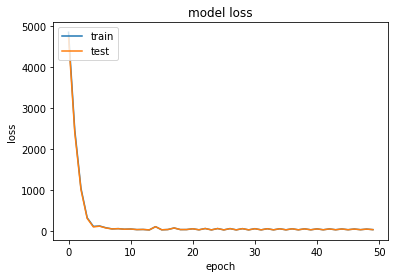

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Keras in Tensorflow

In [37]:
import keras 
from tensorflow.compat.v1.keras.backend import clear_session
# Before instantiating a tf.data.Dataset obj & before model creation, call:
clear_session()

In [38]:
from tensorflow.keras import layers
import datetime
logdir = "logs/scalars/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model = tf1.keras.Sequential()
model.add(layers.Dense(40,input_shape=(8,), activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1))

In [39]:
model.compile(optimizer=tf1.keras.optimizers.RMSprop(0.01),
              loss= tf1.keras.losses.mean_squared_error,
              metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               4100      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


In [40]:
h = model.fit(X_train, y_train, epochs=50, batch_size=1000,validation_data=(X_test, y_test),callbacks=[tensorboard_callback])

Train on 16512 samples, validate on 4128 samples
Epoch 1/50
16512/16512 [==============================] - 0s 7us/sample - loss: 57441.3579 - mse: 57441.3594 - val_loss: 2.5870 - val_mse: 2.5870
Epoch 2/50
16512/16512 [==============================] - 0s 4us/sample - loss: 2.3349 - mse: 2.3349 - val_loss: 2.1552 - val_mse: 2.1552
Epoch 3/50
16512/16512 [==============================] - 0s 5us/sample - loss: 2.2100 - mse: 2.2100 - val_loss: 1.8987 - val_mse: 1.8987
Epoch 4/50
16512/16512 [==============================] - 0s 4us/sample - loss: 2.4825 - mse: 2.4825 - val_loss: 2.9490 - val_mse: 2.9490
Epoch 5/50
16512/16512 [==============================] - 0s 4us/sample - loss: 2.8969 - mse: 2.8969 - val_loss: 3.0775 - val_mse: 3.0775
Epoch 6/50
16512/16512 [==============================] - 0s 5us/sample - loss: 3.7831 - mse: 3.7831 - val_loss: 1.9305 - val_mse: 1.9305
Epoch 7/50
16512/16512 [==============================] - 0s 4us/sample - loss: 4.5707 - mse: 4.5707 - val_loss: 4.

In [45]:
# %load_ext tensorboard
# %tensorboard --logdir logs/scalars

In [43]:
model.evaluate(X_train, y_train)

[1.3367909963509834, 1.3367921]

In [44]:
model.evaluate(X_test, y_test)

[1.3108301001001699, 1.3108299]